In [1]:
import json
import requests
import numpy as np
import pandas as pd
import seaborn as sns
from pprint import pprint

import matplotlib.pyplot as plt
from scipy.stats import linregress
pd.set_option('display.max_rows', None)

Death Rate by State

In [63]:
df1 = pd.read_csv("../Folder2/Final_DeathRate_byState_042021.csv")
df1

,Unnamed: 0,Covid_Death_Rate
0,NaN,4.000000
1,NaN,2021.000000
2,State,NaN
3,RMI,0.000000
4,FSM,0.000000
5,AK,0.521335
6,UT,0.554209
7,VI,0.864000
8,NE,1.020306
9,VT,1.071802


In [64]:
df1.rename(columns={"Unnamed: 0": "State", "Covid_Death_Rate":"Cum_Covid_19_Death_Rate"},inplace=True)
df1.drop([0,1,2,3,4,12,36,41,60,62,56,61],inplace=True)
df1 = df1.reset_index(drop=True)
df1

,State,Cum_Covid_19_Death_Rate
0,AK,0.521335
1,UT,0.554209
2,VI,0.864000
3,NE,1.020306
4,VT,1.071802
5,ID,1.090293
6,WI,1.143160
7,WY,1.215988
8,CO,1.231980
9,MN,1.256834


In [65]:
states = df1["State"]
death_rate = df1["Cum_Covid_19_Death_Rate"]

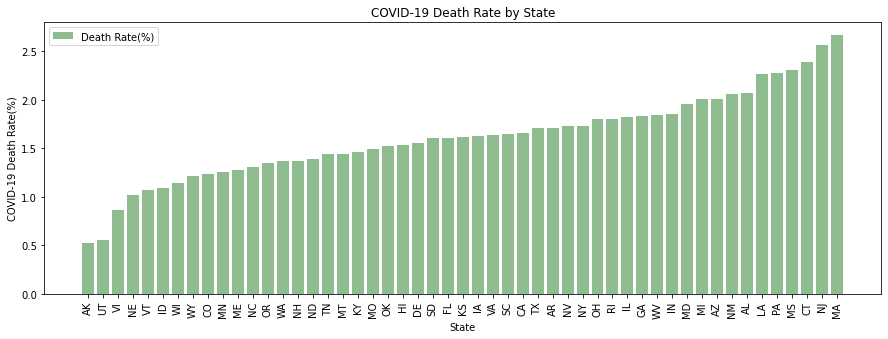

In [66]:
plt.figure(figsize=(15,5))
plt.bar(states,death_rate, color='darkseagreen', label='Death Rate(%)')
#plt.grid(True)
plt.title('COVID-19 Death Rate by State')
plt.ylabel('COVID-19 Death Rate(%)')
plt.xlabel('State')
plt.legend()
plt.xticks(rotation = 90)
plt.savefig("Output/death-rate-by-state.png")
plt.show()

Age Data Analysis

In [67]:
age_data = pd.read_csv("../Folder3/final-age-data.csv")
us_byage_df = age_data.loc[age_data.State=="United States"][["Age Group","Population %"]]
age_data.head()

,Start Date,End Date,Group,State,Age Group,COVID-19 Deaths,Total Deaths,Population by Age Group,COVID-19 Death Rate,Population %,COVID-19 Death Rate by Age
0,1/1/20,4/24/21,By Total,United States,Under 5 years,34.0,4286.0,19531315.0,0.000174,5.963145,0.006099
1,1/1/20,4/24/21,By Total,United States,5-14 years,98.0,6930.0,40926765.0,0.000239,12.495434,0.017579
2,1/1/20,4/24/21,By Total,United States,15-24 years,844.0,44906.0,42599542.0,0.001981,13.006152,0.151394
3,1/1/20,4/24/21,By Total,United States,25-34 years,3741.0,92911.0,45775780.0,0.008172,13.975896,0.671048
4,1/1/20,4/24/21,By Total,United States,35-44 years,9724.0,133834.0,41550175.0,0.023403,12.685768,1.744259


In [68]:
age_data = age_data.loc[age_data['Age Group']!='All Ages']

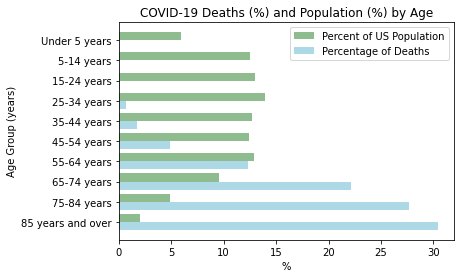

In [69]:
x_axis = []
x_axis = age_data['Age Group'].tolist()
ind = np.arange(len(x_axis))
width = 0.4

death_axis = age_data['COVID-19 Death Rate by Age'].astype(float)
pop_axis = age_data['Population %'].astype(float)
fig, ax = plt.subplots()

ax.barh(ind-width, pop_axis, width, label ='Percent of US Population', color='darkseagreen', align='center')
ax.barh(ind, death_axis, width, color='lightblue', label='Percentage of Deaths', align='center')


ax.set_yticks(ind-.2)
ax.legend()
ax.set_xlabel('%')
ax.set_ylabel('Age Group (years)')
ax.set_yticklabels(x_axis)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title('COVID-19 Deaths (%) and Population (%) by Age')
plt.savefig('Output/COVID-19 Deaths (%) and Population (%) by Age.png')
plt.show()

Age normalization

In [70]:
age_df = pd.read_csv("../Folder3/age-pop-state.csv")
us_byage_df
us_byage = {}
for index,row in us_byage_df.iterrows():
    us_byage[row[0]]=row[1]
    
us_byage  

{'Under 5 years': 5.963145345737688,
 '5-14 years': 12.495433524360758,
 '15-24 years': 13.006152458646906,
 '25-34 years': 13.97589611628876,
 '35-44 years': 12.685768094254609,
 '45-54 years': 12.4569187176404,
 '55-64 years': 12.938714833115196,
 '65-74 years': 9.596938238192193,
 '75-84 years': 4.868197195444035,
 '85 years and over': 2.012835476319459}

death rate/age group[newcolumm]
import us population
us pop or %
deathrate/age group * us pop %
group by state
sum


In [71]:
age_df["Death_Rate_by_Age"]=""
age_df["US_Population_by_Age"]=""
age_df["Normalized_Death_Rate"]=""
us_byage_df
for index, row in age_df.iterrows():
    age_df.loc[index,"Death_Rate_by_Age"] = float(age_df.loc[index,"COVID-19 Deaths"]/age_df.loc[index,"Population"])
    age_group = row[4]
    age_df.loc[index,"US_Population_by_Age"] = float(us_byage[age_group])
    age_df.loc[index,"Normalized_Death_Rate"] = age_df.loc[index,"US_Population_by_Age"]*age_df.loc[index,"Death_Rate_by_Age"]
    state = row[3]
    age_df.loc[index,"State"] = us_state_abbrev[state]


In [72]:
age_df.head(20)

,Start Date,End Date,Group,State,Age Group,COVID-19 Deaths,Population,Death_Rate_by_Age,US_Population_by_Age,Normalized_Death_Rate
0,1/1/20,4/24/21,By Total,USA,Under 5 years,34.0,NaN,NaN,5.96315,NaN
1,1/1/20,4/24/21,By Total,USA,5-14 years,98.0,NaN,NaN,12.4954,NaN
2,1/1/20,4/24/21,By Total,USA,15-24 years,844.0,NaN,NaN,13.0062,NaN
3,1/1/20,4/24/21,By Total,USA,25-34 years,3741.0,NaN,NaN,13.9759,NaN
4,1/1/20,4/24/21,By Total,USA,35-44 years,9724.0,NaN,NaN,12.6858,NaN
5,1/1/20,4/24/21,By Total,USA,45-54 years,27144.0,NaN,NaN,12.4569,NaN
6,1/1/20,4/24/21,By Total,USA,55-64 years,68769.0,NaN,NaN,12.9387,NaN
7,1/1/20,4/24/21,By Total,USA,65-74 years,123309.0,NaN,NaN,9.59694,NaN
8,1/1/20,4/24/21,By Total,USA,75-84 years,154212.0,NaN,NaN,4.8682,NaN
9,1/1/20,4/24/21,By Total,USA,85 years and over,169545.0,NaN,NaN,2.01284,NaN


In [73]:
a = age_df.groupby(by=age_df["State"])["Population"].sum()
b = age_df.groupby(by=age_df["State"])["COVID-19 Deaths"].sum()
c = 100*b/a
d = age_df.groupby(by=age_df["State"])["Normalized_Death_Rate"].sum()
e = d/c

In [74]:
dff

,Actual_DR,Normalized_DR,Delta
State,,,
AK,0.043606,0.063322,1.452128
AL,0.212372,0.207580,0.977434
AR,0.195009,0.189573,0.972121
AZ,0.213197,0.204625,0.959793
CA,0.159406,0.172598,1.082753
CO,0.111413,0.131260,1.178135
CT,0.222198,0.194129,0.873673
DE,0.146545,0.132149,0.901768
FL,0.150644,0.120420,0.799364


In [77]:
dff = pd.DataFrame({"Actual_DR":c,"Normalized_DR":d,"Delta":e})
dff.sort_values(by="Delta",ascending=False)
dfff = dff.merge(df1,on="State")
dfff
dfff.to_csv("../Folder4/normalized_deathrate.csv", index=False, header=True)

In [17]:
%pwd

'/Users/jenniecinelli/Desktop/HomeworkFolder/project_one/Folder4'

In [78]:
dfff["Adj_for_age_Covid_Death_Rate"]=""
for index,row in dfff.iterrows():
    dfff.loc[index,"Adj_for_age_Covid_Death_Rate"]=dfff.loc[index,"Delta"]*dfff.loc[index,"Cum_Covid_19_Death_Rate"]
dfff.to_csv("Output/Adj_for_age_Death_Rate.csv")

In [20]:
dfff = dfff.sort_values(by="Cum_Covid_19_Death_Rate")
adj_death_rate = dfff["Adj_for_age_Covid_Death_Rate"]
death_rate = dfff["Cum_Covid_19_Death_Rate"]
states = dfff["State"]

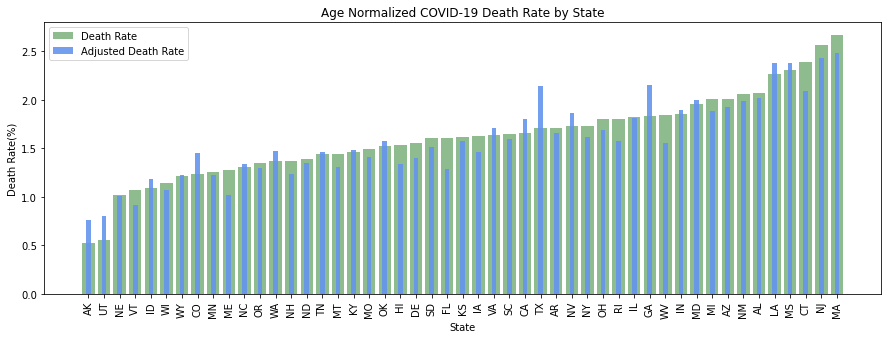

In [21]:
plt.figure(figsize=(15,5))
plt.bar(states,death_rate, label='Death Rate', color='darkseagreen')
plt.bar(states,adj_death_rate, label = 'Adjusted Death Rate', color='cornflowerblue', alpha=.9, width=0.3)
#plt.grid(True, color='lightgrey')
plt.title('Age Normalized COVID-19 Death Rate by State')
plt.ylabel('Death Rate(%)')
plt.xlabel('State')
plt.legend()
plt.xticks(rotation = 90)
#plt.savefig("Output/death-rate-by-state-adjusted.png")
plt.show()

Box plots for death rate/adjusted death rate

In [22]:
dfff = pd.read_csv("Output/Adj_for_age_Death_Rate.csv")
dfff.head()

,Unnamed: 0,State,Actual_DR,Normalized_DR,Delta,Cum_Covid_19_Death_Rate,Adj_for_age_Covid_Death_Rate
0,0,AK,0.043606,0.063322,1.452128,0.521335,0.757045
1,1,AL,0.212372,0.207580,0.977434,2.063941,2.017367
2,2,AR,0.195009,0.189573,0.972121,1.707780,1.660169
3,3,AZ,0.213197,0.204625,0.959793,2.008587,1.927828
4,4,CA,0.159406,0.172598,1.082753,1.662034,1.799573


In [23]:
# Locate the rows which contain mice on Infubinol and get the tumor volumes

death_rate = dfff["Cum_Covid_19_Death_Rate"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
death_quartiles = death_rate.quantile([.25,.5,.75])
death_lowerq = death_quartiles[0.25]
death_upperq = death_quartiles[0.75]
death_iqr = death_upperq-death_lowerq

print(f"The lower quartile of the death rate for all states is: {round(death_lowerq,2)}")
print(f"The upper quartile of the death rate for all states is: {round(death_upperq,2)}")
print(f"The interquartile range of the death rate for all states is: {round(death_iqr,2)}")
print(f"The median of the death rate for all states is: {round(death_quartiles[0.5],2)} ")

# Determine outliers using upper and lower bounds
death_lower_bound = death_lowerq - (1.5*death_iqr)
death_upper_bound = death_upperq + (1.5*death_iqr)
print(f"Values below {round(death_lower_bound,2)} could be outliers.")
print(f"Values above {round(death_upper_bound,2)} could be outliers.")

The lower quartile of the death rate for all states is: 1.36
The upper quartile of the death rate for all states is: 1.84
The interquartile range of the death rate for all states is: 0.47
The median of the death rate for all states is: 1.61 
Values below 0.66 could be outliers.
Values above 2.54 could be outliers.


In [24]:
# Locate the rows which contain mice on Infubinol and get the tumor volumes

adj_rate = dfff["Adj_for_age_Covid_Death_Rate"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
adj_quartiles = adj_rate.quantile([.25,.5,.75])
adj_lowerq = adj_quartiles[0.25]
adj_upperq = adj_quartiles[0.75]
adj_iqr = adj_upperq-adj_lowerq

print(f"The lower quartile of the adjusted death rate for all states is: {round(adj_lowerq,2)}")
print(f"The upper quartile of the adjusted death rate for all states is: {round(adj_upperq,2)}")
print(f"The interquartile range of the adjusted death rate for all states is: {round(adj_iqr,2)}")
print(f"The median of the adjusted death rate for all states is: {round(adj_quartiles[0.5],2)} ")

# Determine outliers using upper and lower bounds
adj_lower_bound = adj_lowerq - (1.5*adj_iqr)
adj_upper_bound = adj_upperq + (1.5*adj_iqr)
print(f"Values below {round(adj_lower_bound,2)} could be outliers.")
print(f"Values above {round(adj_upper_bound,2)} could be outliers.")

The lower quartile of the adjusted death rate for all states is: 1.31
The upper quartile of the adjusted death rate for all states is: 1.89
The interquartile range of the adjusted death rate for all states is: 0.58
The median of the adjusted death rate for all states is: 1.56 
Values below 0.44 could be outliers.
Values above 2.75 could be outliers.


In [25]:
values = [death_rate, adj_rate]
labels = ["Death Rate", "Adjusted Death Rate"]

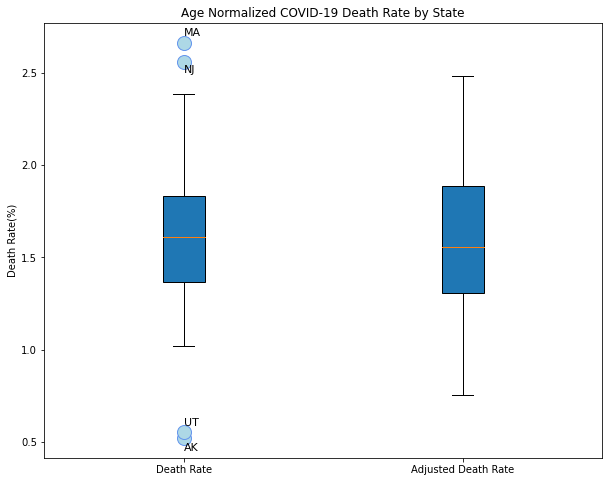

In [26]:
fig, ax1 = plt.subplots(figsize=(10, 8))
flierprops = dict(marker='o', 
                  markersize=14, 
                  markerfacecolor='lightblue',
                  markeredgecolor='cornflowerblue')

plt.boxplot = ax1.boxplot(values, labels=labels, patch_artist=True, flierprops=flierprops)

plt.annotate('MA',
    (1, 2.7),
    xytext=(1, 2.7),
    fontsize=11)
plt.annotate('NJ',
    (1, 2.5),
    xytext=(1, 2.5),
    fontsize=11)
plt.annotate('AK',
    (1, 0.45),
    xytext=(1, 0.45),
    fontsize=11)
plt.annotate('UT',
    (1, 0.59),
    xytext=(1, 0.59),
    fontsize=11)


#for index, row in df1.iterrows():
#        print(f"{row[0]} at coords: ({row[1]})")
#        plt.annotate(row[0],row[1])
plt.title('Age Normalized COVID-19 Death Rate by State')
plt.ylabel('Death Rate(%)')
plt.savefig("Output/death-rate-boxplot.png")
plt.show()


Health Data - Hospital Beds

In [80]:
hospital_df = pd.read_csv("../Folder1/hospitalbeds_percapita_bystate.csv",skiprows=(0,1))

,Location,State/Local Government,Non-Profit,For-Profit,Total
0,United States,0.3,1.7,0.4,2.4
1,Alabama,1.4,0.8,0.9,3.1
2,Alaska,0.3,1.5,0.4,2.2
3,Arizona,0.1,1.4,0.5,1.9
4,Arkansas,0.3,2.1,0.6,3.0
5,California,0.3,1.2,0.3,1.9
6,Colorado,0.4,1.1,0.4,1.9
7,Connecticut,0.1,1.9,0.0,2.0
8,Delaware,NaN,2.1,0.0,2.2
9,District of Columbia,NaN,3.5,1.0,4.5


In [28]:
hospital_df.drop([52,53,54,55,56,57,58,59,60,61,62,63,64,65,66],inplace=True)
hospital_df = hospital_df.reset_index(drop=True)

In [29]:
hospital_df.head()

,Location,State/Local Government,Non-Profit,For-Profit,Total
0,United States,0.3,1.7,0.4,2.4
1,Alabama,1.4,0.8,0.9,3.1
2,Alaska,0.3,1.5,0.4,2.2
3,Arizona,0.1,1.4,0.5,1.9
4,Arkansas,0.3,2.1,0.6,3.0


In [30]:
us_state_abbrev = {
    'United States': 'USA',
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York City':"NYC",
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [31]:
total_beds = []
total_beds = hospital_df['Total'].tolist()

In [32]:
states = hospital_df["Location"].unique()

In [33]:
Dict = {"States":[],"Total Beds":[]}
for state in states:

    Dict["States"].append(us_state_abbrev[state])
    Dict["Total Beds"].append(total_beds)

In [34]:
hospital_beds = pd.DataFrame(Dict)
hospital_beds['Total Beds'] = total_beds

In [35]:
df_deathrate = pd.read_csv("../Folder2/Final_DeathRate_byState_042021.csv")
df_deathrate.rename(columns={"Unnamed: 0":"States"},inplace=True)
df_deathrate = df_deathrate.loc[df_deathrate['States']!='RMI']
df_deathrate = df_deathrate.loc[df_deathrate['States']!='FSM']
df_deathrate = df_deathrate.loc[df_deathrate['States']!='AS']
df_deathrate = df_deathrate.loc[df_deathrate['States']!='NYC']
df_deathrate = df_deathrate.loc[df_deathrate['States']!='PW']
df_deathrate = df_deathrate.loc[df_deathrate['States']!='DC']
df_deathrate = df_deathrate.loc[df_deathrate['States']!='PR']
df_deathrate = df_deathrate.loc[df_deathrate['States']!='GU']
df_deathrate = df_deathrate.loc[df_deathrate['States']!='MP']

In [36]:
df_deathrate = df_deathrate.dropna()

In [37]:
df_deathrate = df_deathrate.reset_index(drop=True)

In [79]:
df_merge = df_deathrate.merge(hospital_beds, how='inner', on="States")

df_merge.to_csv("Hospital_beds.csv")

,States,Covid_Death_Rate,Total Beds
0,AK,0.521335,2.2
1,UT,0.554209,1.8
2,NE,1.020306,3.1
3,VT,1.071802,2.0
4,ID,1.090293,1.9
5,WI,1.143160,2.0
6,WY,1.215988,3.4
7,CO,1.231980,1.9
8,MN,1.256834,2.5
9,ME,1.274175,2.6


In [39]:
state_names = df_merge["States"]
total_beds = df_merge["Total Beds"]
Covid_Death_Rate = df_merge["Covid_Death_Rate"]

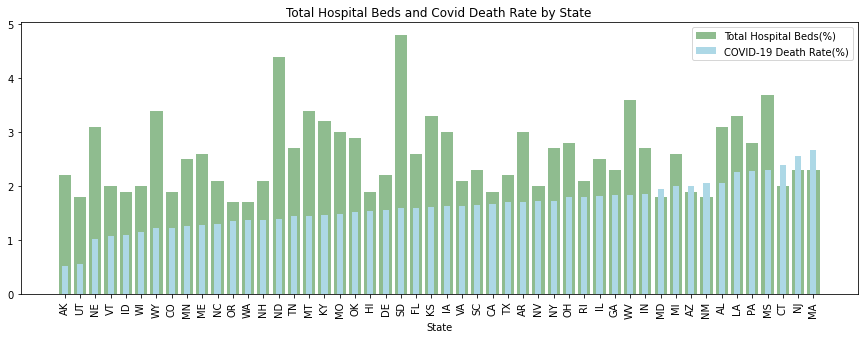

In [40]:
plt.figure(figsize=(15,5))
plt.bar(state_names, total_beds, label='Total Hospital Beds(%)', color='darkseagreen')
plt.bar(state_names, Covid_Death_Rate, label='COVID-19 Death Rate(%)', width=.4, color='lightblue')
#plt.grid(True, color='lightgrey')
plt.title('Total Hospital Beds and Covid Death Rate by State')
plt.xlabel('State')
plt.xticks(rotation = 90)
plt.legend()
fig.tight_layout()
plt.show()

In [41]:
renamed_beds = hospital_beds.rename(columns={'States':'State'})

In [42]:
dfff_merged = dfff.merge(renamed_beds, how='inner', on="State")
dfff_merged = dfff_merged.sort_values(by="Adj_for_age_Covid_Death_Rate")

In [43]:
dfff_merged.head()

,Unnamed: 0,State,Actual_DR,Normalized_DR,Delta,Cum_Covid_19_Death_Rate,Adj_for_age_Covid_Death_Rate,Total Beds
0,0,AK,0.043606,0.063322,1.452128,0.521335,0.757045,2.2
42,42,UT,0.073363,0.106704,1.454459,0.554209,0.806074,1.8
44,44,VT,0.034616,0.029556,0.853828,1.071802,0.915134,2.0
28,28,NE,0.145057,0.143926,0.992200,1.020306,1.012348,3.1
20,20,ME,0.064052,0.051090,0.797628,1.274175,1.016317,2.6


In [44]:
states_names = dfff_merged["State"]
totals_beds = dfff_merged["Total Beds"]

In [45]:
adj_death_rates = dfff_merged["Adj_for_age_Covid_Death_Rate"]


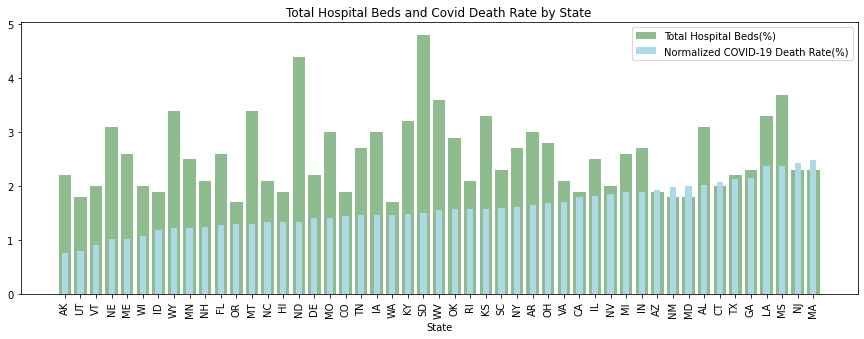

In [46]:
plt.figure(figsize=(15,5))
plt.bar(states_names, totals_beds, label='Total Hospital Beds(%)', color='darkseagreen')
plt.bar(states_names, adj_death_rates, label='Normalized COVID-19 Death Rate(%)', width=.4, color='lightblue')
#plt.grid(True, color='lightgrey')
plt.title('Total Hospital Beds and Covid Death Rate by State')
plt.xlabel('State')
plt.xticks(rotation = 90)
plt.legend()
fig.tight_layout()
plt.savefig("Output/death-rate-and-beds-by-state.png")
plt.show()

In [47]:
df_merge.head()

,States,Covid_Death_Rate,Total Beds
0,AK,0.521335,2.2
1,UT,0.554209,1.8
2,NE,1.020306,3.1
3,VT,1.071802,2.0
4,ID,1.090293,1.9


In [48]:
dfff_merged.head()

,Unnamed: 0,State,Actual_DR,Normalized_DR,Delta,Cum_Covid_19_Death_Rate,Adj_for_age_Covid_Death_Rate,Total Beds
0,0,AK,0.043606,0.063322,1.452128,0.521335,0.757045,2.2
42,42,UT,0.073363,0.106704,1.454459,0.554209,0.806074,1.8
44,44,VT,0.034616,0.029556,0.853828,1.071802,0.915134,2.0
28,28,NE,0.145057,0.143926,0.992200,1.020306,1.012348,3.1
20,20,ME,0.064052,0.051090,0.797628,1.274175,1.016317,2.6


The r-squared is 0.0
The line equation is: y = 0.03x + 1.52


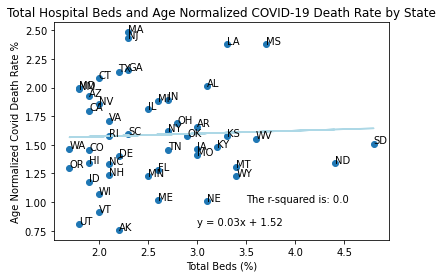

In [49]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(totals_beds, adj_death_rates)

regress_values = totals_beds * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(totals_beds, adj_death_rates)

plt.plot(totals_beds,regress_values,"lightblue")

r_sqr = round(rvalue**2,2)

plt.annotate(line_eq,(3, .8),fontsize=10,color="black")

plt.annotate(f"The r-squared is: {r_sqr}",(3.5,1),fontsize=10,color="black")

plt.xlabel('Total Beds (%)')
plt.ylabel('Age Normalized Covid Death Rate %')
plt.title("Total Hospital Beds and Age Normalized COVID-19 Death Rate by State")

print(f"The r-squared is {r_sqr}")
print(f"The line equation is: {line_eq}")

for index, row in dfff_merged.iterrows():
    #print(f"{row[0]} at coords: ({row[2]},{row[1]})")
    plt.annotate(row[1],(row[7],row[6]))

plt.savefig("Output/total-beds-and-deaths-regression.png")
plt.show()
